## <font color='blue'>Problem</font>
### How to communicate with each others?

<div>
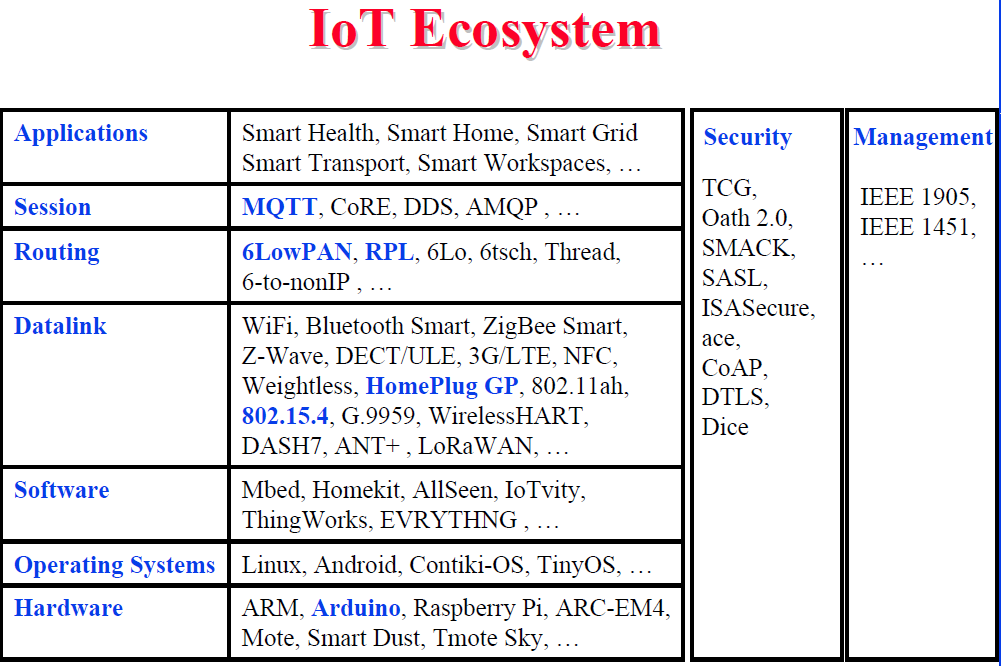
</div>

### MQ Telemetry Transport (MQTT):
* Lightweight messaging protocol for M2M communication was invented and sponsored by IBM.  
* Now Open source. Open Source libraries available.  
* MQ originated from “message queueing (MQ)” architecture used by IBM for service oriented networks. 
    * There is no queueing in MQTT. Telemetry data goes from devices to a server or broker.
    * Uses a publish/subscribe mechanism. Lightweight = Low network bandwidth and small code footprint
    
* Facebook messenger uses MQTT to minimize battery usage. Several other applications in medical, environmental applications
    
* Many open source implementations of clients and brokers are available 
* Really small message broker (RSMB): Mosquitto
* Micro broker: Java based for PDAs, notebooks

<div>
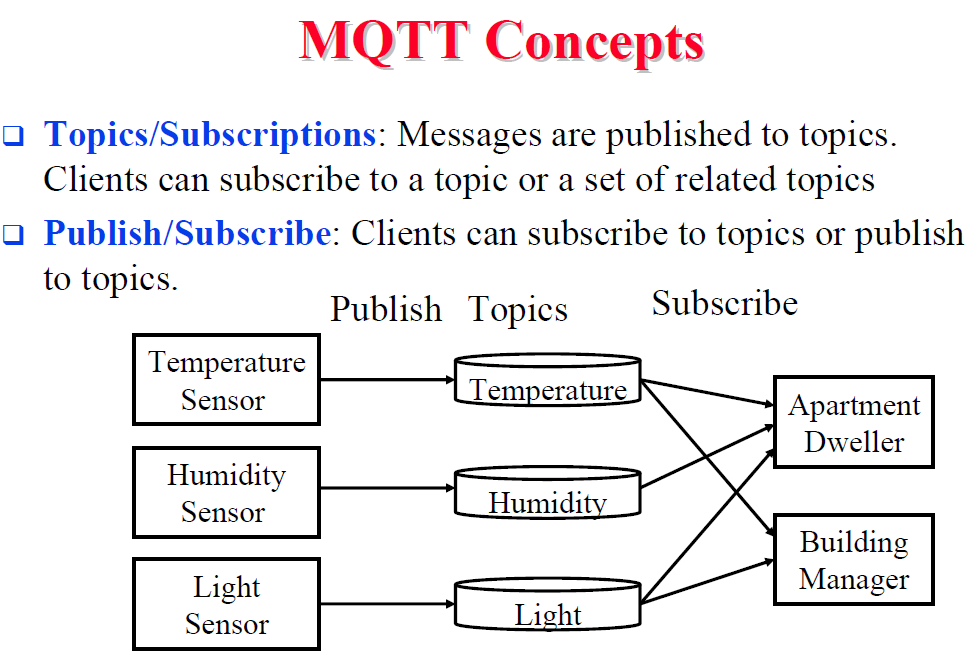
</div>

<div>
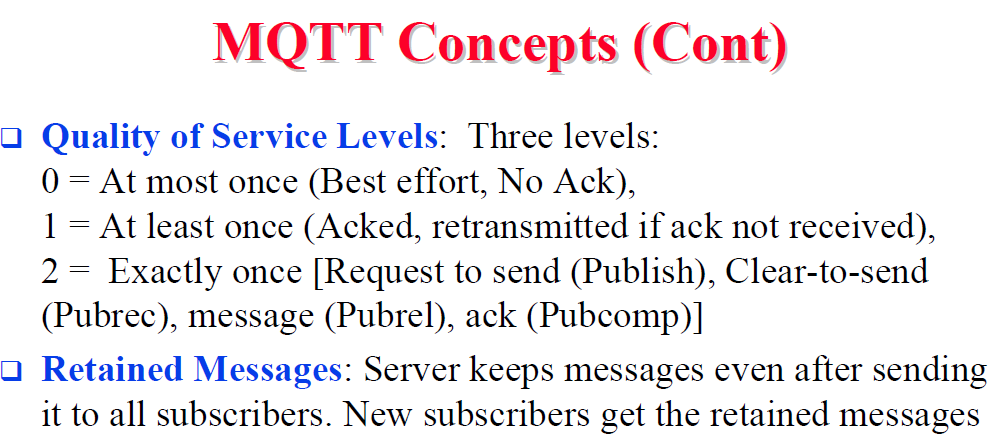
</div>

<div>
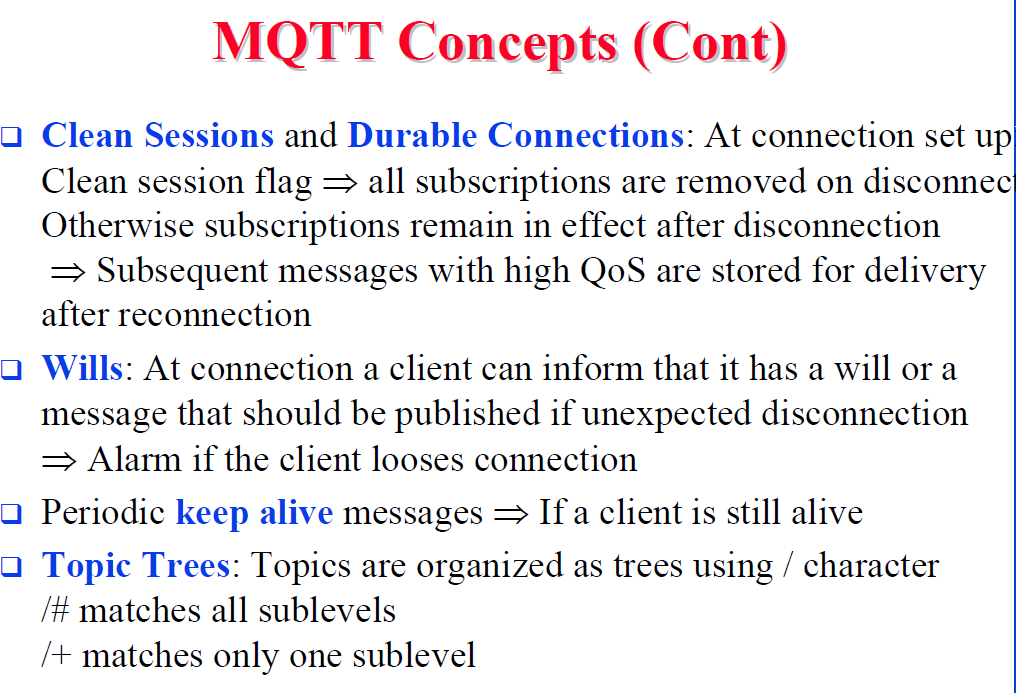
</div>

<div>
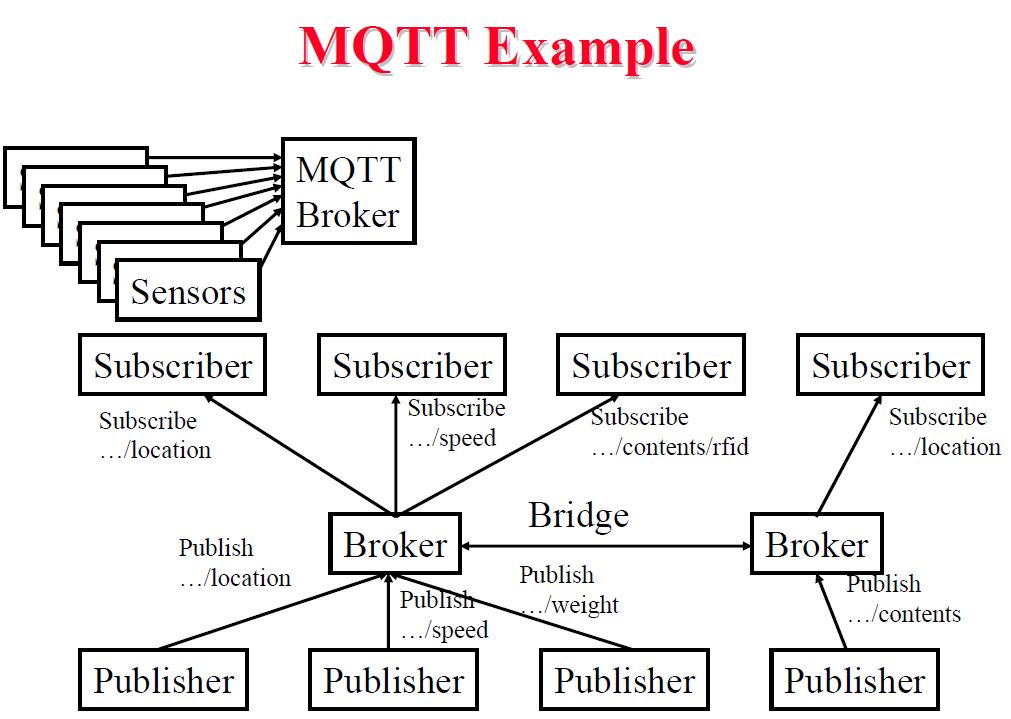
</div>

<div>
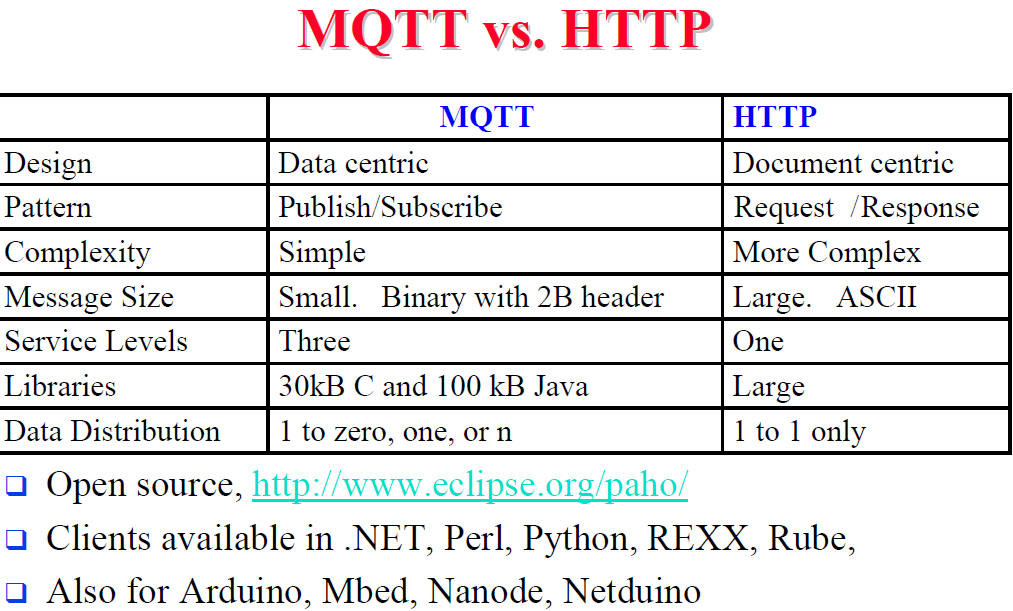
</div>

In [ ]:
### Installatoin:
http://www.steves-internet-guide.com/into-mqtt-python-client/
    
Installatoin:
(Windows) pip install paho-mqtt \
(Linux) pip3 install paho-mqtt

Example: \
    1. subscriber \
    2. publisher

### <font color='blue'>Subscriber</font>

#### Goal: Subscribe messages in topic by MQTT 

In [1]:
# Subscriber.py
import paho.mqtt.subscribe as subscribe

#host = '127.0.0.1'
host = "broker.emqx.io"
portNo = 	1883

In [ ]:
def on_message_print(client, userdata, message):
    print("%s %s" % (message.topic, message.payload))

# In[]
# Test 1: start first to subscribe mqtt message by "mislab/mqtt/simple" 
    
msg = subscribe.simple("mislab/mqtt/simple", hostname=host)
print("I got mqtt: %s with %s" % (msg.topic, msg.payload))

In [ ]:
# In[]
# Test 2: start first to subscribe mqtt message by "mislab/mqtt/callback" without stop

subscribe.callback(on_message_print, "mislab/id/xxx", hostname=host)

In [ ]:
# In[]
# Test 3: start first to subscribe mqtt message by "mislab/mqtt/multiple" without stop

subscribe.callback(on_message_print, "mislab/mqtt/multiple", hostname=host)

In [ ]:
# In[]
# Test 4: use another MQTT Server

host = "m14.cloudmqtt.com" 
portNo = 	17640 
authpass = {'username':"vfhmwuwd", 'password':"9Na3SdDn7KvW"}
subscribe.callback(on_message_print, "mislab/mqtt/cloudmqtt", hostname=host, port = portNo, auth = authpass)

### <font color='blue'>Publisher</font>

#### Goal: Publish messgaes in topic by MQTT

In [ ]:
# Publisher.py
import paho.mqtt.publish as publish
import json

#host = '127.0.0.1'
host = "broker.emqx.io"
portNo = 	1883

msg = {"subject":"Math","score":70}
jmsg = json.dumps(msg, ensure_ascii=False)

In [ ]:
# In[]
# Test 1: start later to publish mqtt message by "mislab/mqtt/simple" 

publish.single("mislab/mqtt/simple", jmsg, hostname= host)

In [ ]:
# In[]
# Test 2: start later to publish mqtt message by "mislab/mqtt/callback" 

publish.single("mislab/mqtt/control", jmsg, hostname = host)

In [ ]:
# In[]
# Test 3: start later to publish mqtt message by "mislab/mqtt/multiple" 

msgs = [{'topic':"mislab/mqtt/multiple",'payload': "multiple 1"},
        ("mislab/mqtt/multiple", 'multiple 2', 0, False)]
publish.multiple(msgs, hostname = host)

In [ ]:
# In[]
# Test 4: use another MQTT Server
# start later to publish mqtt message by 'mislab/mqtt/callback' 

host = "m14.cloudmqtt.com" 
portNo = 	17640 
authpass = {'username':"vfhmwuwd", 'password':"9Na3SdDn7KvW"}

publish.single("mislab/mqtt/cloudmqtt", jmsg, hostname= host, port = portNo, auth = authpass)

### <font color='blue'>Applications: Timer+Thread+MQTT</font>

In [ ]:
import paho.mqtt.publish as publish
import json

import time
import threading
import datetime

host = "iot.eclipse.org"
portNo = 	1883

msg = {"subject":"Math","score":70}
jmsg = json.dumps(msg, ensure_ascii=False)

# In[]

smpPeriod = 3     #sample period in sec
#--------------------------------------------------------------------------------------------
# Enable a stable time to triger data collection
#--------------------------------------------------------------------------------------------            
class T0(object):
    
    def __init__(self, period):
        self.pd = period
    
    def run(self):
        ts = datetime.datetime.now()
        ts = time.mktime(ts.timetuple())
        while (True):
            tf = datetime.datetime.now()
            tf = time.mktime(tf.timetuple())
            msg = str(tf-ts)
            jmsg = json.dumps(msg, ensure_ascii=False)
            publish.single("mislab/id/xyz", jmsg, hostname = host)
            ts=tf
            time.sleep(self.pd)

#------------------------------------------------------------------------------------------------        
if __name__ == '__main__':

    t0 = T0(smpPeriod)
    mt = threading.Thread(target = t0.run,  args=())

    mt.start()  # start the triger timer


### <font color='blue'>What is JSON</font>
JSON（JavaScript Object Notation）

In [ ]:
### Installatoin of Node-red:

1. install Node.js, node-red
    
2. run node-red in command mode
    path: command mode > node-red
          browser > http://127.0.0.1:1880

3. run Calculator REST Service
https://www.youtube.com/watch?v=xntpcrLoeyE&feature=youtu.be
    

4. install nodes in node-red
    path: from palette-> user-setting->install->palette search for 
    item: node-red-dashboard, input-split 

5. import flows
    path:  import-> library 
    item: Control.json, Monitor.json